# Under & Over sampling

In [ ]:
#its technique to match the data whihc is imabalace,beacuse imbalance data lead to worng prediction.

#here is 4 models have to be created while sampling 
1) as it is 
2) Over sampling tech
3) Under sampling tech
4) Hybrid samplig ( both )


# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
from  sklearn.metrics import accuracy_score,classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split
#SMOTE -- > Synthetic minority Oversampling Technique

# Read the data

In [3]:
hr=pd.read_csv('F:\DATA SCIENCE\python\py\ALGORITHMS\Over and undersampling\hr_emp.csv')
hr


,attrition,age,travel,department,distance,gender,job_satisf,marital,num_comp,total_exp,yrs_in comp,yrs_in_curr_role,yrs_since_prom,yrs_with_curr_mgr
0,Yes,41,Travel_Rarely,Sales,1,Female,4,Single,8,8,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,Male,2,Married,1,10,10,7,1,7
2,No,33,Travel_Frequently,Research & Development,3,Female,3,Married,1,8,8,7,3,0
3,No,27,Travel_Rarely,Research & Development,2,Male,2,Married,9,6,2,2,2,2
4,No,32,Travel_Frequently,Research & Development,2,Male,4,Single,0,8,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,No,36,Non-Travel,Sales,15,Male,4,Divorced,1,15,15,12,11,11
2936,No,38,Travel_Rarely,Sales,10,Female,4,Married,1,10,10,7,1,9
2937,Yes,50,Travel_Frequently,Sales,1,Male,3,Divorced,7,12,6,3,0,1
2938,No,31,Non-Travel,Research & Development,5,Male,1,Single,0,10,9,4,1,7


# Explore the data

In [4]:
hr.shape
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   attrition          2940 non-null   object
 1   age                2940 non-null   int64 
 2   travel             2940 non-null   object
 3   department         2940 non-null   object
 4   distance           2940 non-null   int64 
 5   gender             2940 non-null   object
 6   job_satisf         2940 non-null   int64 
 7   marital            2940 non-null   object
 8   num_comp           2940 non-null   int64 
 9   total_exp          2940 non-null   int64 
 10  yrs_in comp        2940 non-null   int64 
 11  yrs_in_curr_role   2940 non-null   int64 
 12  yrs_since_prom     2940 non-null   int64 
 13  yrs_with_curr_mgr  2940 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 321.7+ KB


In [5]:
#TO get the Imbalanced data
hr.attrition.value_counts()
#so here our y varible is attrition ,where we find its imbalanced data 

No     2466
Yes     474
Name: attrition, dtype: int64

In [6]:
2466/len(hr)
474/len(hr)
2466/474
#but beacuse of data is imbalnced its misleading in prediction so..resampled the data
#so 5.2 % employee is going to leave so from 5, 1 employee going to leave
 
#before doing oversampling ensure thath the data is numeric

5.2025316455696204

#To get the numeric data

In [7]:
hr.dtypes
nc=hr.select_dtypes(exclude='object').columns.values
nc
y='attrition'
#_________________________________
#OVER sampling of data using Smote
#___________________________________

In [8]:
nc

array(['age', 'distance', 'job_satisf', 'num_comp', 'total_exp',
       'yrs_in comp', 'yrs_in_curr_role', 'yrs_since_prom',
       'yrs_with_curr_mgr'], dtype=object)

# Oversampling tech - SMOTE - Synthetic minority oversampling technique

In [9]:
sm=SMOTE()

In [10]:
attrx1,attry1=sm.fit_resample(hr[nc],hr[y])

#print the actual and oversampling data

In [11]:
print('actual attrtion={},oversampled attrition={}'.format(len(hr),len(attrx1)))

actual attrtion=2940,oversampled attrition=4932


#Print Y varibel to cross validate

In [12]:
print('actual Y = \n {},\n oversampled Y = \n{}'.format(hr[y].value_counts(), attry1.value_counts()))

actual Y = 
 No     2466
Yes     474
Name: attrition, dtype: int64,
 oversampled Y = 
No     2466
Yes    2466
Name: attrition, dtype: int64


#So now build the model using oversampled data i.e attrx1,attry1

In [13]:
attrx1
attry1

0       Yes
1        No
2        No
3        No
4        No
       ... 
4927    Yes
4928    Yes
4929    Yes
4930    Yes
4931    Yes
Name: attrition, Length: 4932, dtype: object

# Under Sampling technique useing Nearmiss

In [14]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()
attrx2,attry2=nm.fit_resample(hr[nc],hr[y])
#print the actual and undersampled data info

In [15]:
print("actual X = {}, undersampled X ={}".format(len(hr), len(attrx2)))

actual X = 2940, undersampled X =948


In [16]:
print('actual Y=\n {},\n undersampled y =\n{}'.format(hr[y].value_counts(), attry2.value_counts()))

actual Y=
 No     2466
Yes     474
Name: attrition, dtype: int64,
 undersampled y =
Yes    474
No     474
Name: attrition, dtype: int64


# Hybrid Model -By using Both Oversampling and Undersampling

In [17]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

#Configure the % of sampling

In [38]:
oversample=SMOTE(sampling_strategy=0.20)
undersamp=RandomUnderSampler(sampling_strategy=0.5)

In [39]:
steps=[('o',oversample),('u',undersamp)]

In [40]:
attrx3,attry3=Pipeline(steps=steps).fit_resample(hr[nc],hr[y])
attrx3
attry3

0        No
1        No
2        No
3        No
4        No
       ... 
1474    Yes
1475    Yes
1476    Yes
1477    Yes
1478    Yes
Name: attrition, Length: 1479, dtype: object

#Print the data and take count of change

#Print the actula and undersampled data info<br>


In [41]:
print('actual X ={},hybrid X={}'.format(len(hr), len(attrx3)))
#Y
print('actual Y=\n{},\n hybrid Y=\n {}'.format(hr[y].value_counts(), attry3.value_counts()))
#so by hybrid our ration is noe 2:1 which not that much imbalanced than actual

actual X =2940,hybrid X=1479
actual Y=
No     2466
Yes     474
Name: attrition, dtype: int64,
 hybrid Y=
 No     986
Yes    493
Name: attrition, dtype: int64


#1)build the logistic regression with all sampling techniquees and predict the churn
#2)compare all the results with all sampling tech

#so now we have all the reasmpled data 

# Basic model on Logistic regression

In [42]:
nc=hr.select_dtypes(include=np.number)
nc
fc=hr.select_dtypes(exclude=np.number)
fc

,attrition,travel,department,gender,marital
0,Yes,Travel_Rarely,Sales,Female,Single
1,No,Travel_Frequently,Research & Development,Male,Married
2,No,Travel_Frequently,Research & Development,Female,Married
3,No,Travel_Rarely,Research & Development,Male,Married
4,No,Travel_Frequently,Research & Development,Male,Single
...,...,...,...,...,...
2935,No,Non-Travel,Sales,Male,Divorced
2936,No,Travel_Rarely,Sales,Female,Married
2937,Yes,Travel_Frequently,Sales,Male,Divorced
2938,No,Non-Travel,Research & Development,Male,Single


DA of data 

In [43]:
hr.isnull().sum()
#so there is no null in data

attrition            0
age                  0
travel               0
department           0
distance             0
gender               0
job_satisf           0
marital              0
num_comp             0
total_exp            0
yrs_in comp          0
yrs_in_curr_role     0
yrs_since_prom       0
yrs_with_curr_mgr    0
dtype: int64

#Checking for 0  in data

In [49]:
hr[hr==0].count()

attrition               0
age                     0
travel                  0
department              0
distance                0
gender                  0
job_satisf              0
marital                 0
num_comp              394
total_exp              22
yrs_in comp            88
yrs_in_curr_role      488
yrs_since_prom       1162
yrs_with_curr_mgr     526
dtype: int64

In [50]:
hr.num_comp.value_counts()

1    1042
0     394
3     318
2     292
4     278
7     148
6     140
5     126
9     104
8      98
Name: num_comp, dtype: int64

In [51]:
# now we have to convert the data to dummy for exact prediction

#Check multicolinearity to find out relation between features<br>
#correlation matrix - take only the lower triangle. then plot the heatmap to check collinearity<br>
#_

Text(0.5, 1.0, 'correlation Matrix')

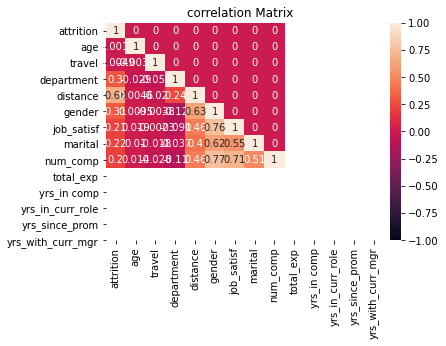

In [54]:
import matplotlib.pyplot as plt
hr.dtypes
#cols=nc
cor = nc.corr()
cor = np.tril(cor)
sns.heatmap(cor,xticklabels=cols,yticklabels=cols,
            vmin=-1,vmax=1,annot=True,square=False)
plt.title("correlation Matrix")
#so avoid the coreelation in basic model

#now  train test split of data for bsuilind basic model

In [ ]:
hr

In [64]:
fc
nc
# convert factor to dummies
new_data = fc
new_data
for f in fc:
    dummy = pd.get_dummies(new_data[f],drop_first=True,prefix=f)
    new_data = new_data.join(dummy)
    
new_data.head(5)


,attrition,travel,department,gender,marital,attrition_Yes,travel_Travel_Frequently,travel_Travel_Rarely,department_Research & Development,department_Sales,gender_Male,marital_Married,marital_Single
0,Yes,Travel_Rarely,Sales,Female,Single,1,0,1,0,1,0,0,1
1,No,Travel_Frequently,Research & Development,Male,Married,0,1,0,1,0,1,1,0
2,No,Travel_Frequently,Research & Development,Female,Married,0,1,0,1,0,0,1,0
3,No,Travel_Rarely,Research & Development,Male,Married,0,0,1,1,0,1,1,0
4,No,Travel_Frequently,Research & Development,Male,Single,0,1,0,1,0,1,0,1


In [56]:
new_cols = new_data.columns
new_cols

Index(['attrition', 'travel', 'department', 'gender', 'marital',
       'attrition_Yes', 'travel_Travel_Frequently', 'travel_Travel_Rarely',
       'department_Research & Development', 'department_Sales', 'gender_Male',
       'marital_Married', 'marital_Single'],
      dtype='object')

#remove the original factors

In [73]:
new_cols = list(set(new_cols) - set(fc))
new_cols

['travel_Travel_Rarely',
 'marital_Single',
 'department_Research & Development',
 'marital_Married',
 'gender_Male',
 'attrition_Yes',
 'travel_Travel_Frequently',
 'department_Sales']

refresh the new dataset with the new columns

In [74]:
new_data = new_data[new_cols]
new_data
new_data.columns
#numerical varible  
#nc



Index(['travel_Travel_Rarely', 'marital_Single',
       'department_Research & Development', 'marital_Married', 'gender_Male',
       'attrition_Yes', 'travel_Travel_Frequently', 'department_Sales'],
      dtype='object')

In [75]:
# Join numerical + categorical dataset
# Categorical dataset = new_data
data= new_data.join(nc)
#data.head
data.shape
data.columns

Index(['travel_Travel_Rarely', 'marital_Single',
       'department_Research & Development', 'marital_Married', 'gender_Male',
       'attrition_Yes', 'travel_Travel_Frequently', 'department_Sales', 'age',
       'distance', 'job_satisf', 'num_comp', 'total_exp', 'yrs_in comp',
       'yrs_in_curr_role', 'yrs_since_prom', 'yrs_with_curr_mgr'],
      dtype='object')

In [76]:
# split the data into train and test
trainx,testx,trainy,testy = train_test_split(
    data.drop('attrition_Yes',axis=1),
    data['attrition_Yes'],
    test_size=0.25)

In [77]:
trainx
trainy
testy

80      0
1700    0
2442    0
2413    0
887     0
       ..
2402    0
2386    1
2484    0
2134    0
891     0
Name: attrition_Yes, Length: 735, dtype: uint8

In [78]:
print('trainx={}, trainy={}, testx={}, test={}'.format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(2205, 16), trainy=(2205,), testx=(735, 16), test=(735,)


In [79]:
import statsmodels.api as sm 
#in logistic regression Logit is the maths behind classification
#in linear regression OLS(ordinary least squarre is math behind regression)
trainy
trainx
m1 = sm.Logit(trainy,trainx).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


E:\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
E:\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


summary of the model

In [80]:
m1.summary()

E:\anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
E:\anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          attrition_Yes   No. Observations:                 2205
Model:                          Logit   Df Residuals:                     2189
Method:                           MLE   Df Model:                           15
Date:                Fri, 28 May 2021   Pseudo R-squ.:                     inf
Time:                        00:02:43   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
travel_Travel_Rarely                  0.5895      0.216      2.733      0.006       0.167       1.012
marital_Single                        1.1046      0.174      6.366      0.000       0.765       1.445
department_Research & Development    -0.7695      0.232     -3.323      0.001      -1.223      -0.316
marital_Married                       0.1160      0.177      0.655      0.512      -0.231       0.463
gender_Male                           0.1894      0.126      1.507      0.132      -0.057       0.436
travel_Travel_Frequently              1.3820      0.238      5.801      0.000       0.915       1.849
department_Sales                     -0.3551      0.243     -1.459      0.144      -0.832       0.122
age                                  -0.0396      0.008     -4.694      0.000      -0.056      -0.023
distance                              0.0333      0.007      4.507      0.000       0.019       0.048
job_satisf                           -0.3384      0.054     -6.237      0.000      -0.445      -0.232
num_comp                              0.1510      0.027      5.630      0.000       0.098       0.204
total_exp                            -0.0641      0.017     -3.709      0.000      -0.098      -0.030
yrs_in comp                           0.0790      0.026      2.996      0.003       0.027       0.131
yrs_in_curr_role                     -0.1277      0.031     -4.089      0.000      -0.189      -0.067
yrs_since_prom                        0.1364      0.029      4.768      0.000       0.080       0.192
yrs_with_curr_mgr                    -0.1300      0.032     -4.056      0.000      -0.193      -0.067
=====================================================================================================
"""

beta values for individual features

In [81]:
m1.params

travel_Travel_Rarely                 0.589520
marital_Single                       1.104598
department_Research & Development   -0.769466
marital_Married                      0.115958
gender_Male                          0.189428
travel_Travel_Frequently             1.381965
department_Sales                    -0.355142
age                                 -0.039583
distance                             0.033331
job_satisf                          -0.338395
num_comp                             0.150995
total_exp                           -0.064050
yrs_in comp                          0.079003
yrs_in_curr_role                    -0.127730
yrs_since_prom                       0.136414
yrs_with_curr_mgr                   -0.130026
dtype: float64

In [82]:
p1=m1.predict(testx)

In [83]:
p1

80      0.077780
1700    0.064061
2442    0.161150
2413    0.327611
887     0.006522
          ...   
2402    0.289548
2386    0.021341
2484    0.369919
2134    0.032929
891     0.195821
Length: 735, dtype: float64

In [84]:
P1_y=p1.copy()

In [85]:
P1_y[P1_y < 0.5]=1
P1_y[P1_y > 0.5]=0

In [86]:
print(classification_report(testy,P1_y))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       633
           1       0.00      0.00      0.00       102

    accuracy                           0.86       735
   macro avg       0.43      0.50      0.46       735
weighted avg       0.74      0.86      0.80       735



E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
df = pd.DataFrame({'actual':testy,'predicted':P1_y})
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,0.0,All
actual,,
0,633,633
1,102,102
All,735,735
